In [1]:
import numpy as np
import matplotlib.pyplot as plt
import camdesign as cd
import pandas as pd

# Datos del problema

In [3]:
radio_leva = 1.5

f_pisada = [0, 113, 80, 108, 0, 0]
grados = [0, 57, 125, 200, 260, 360]
desplazamiento = [0, 0, 0, 0, 0, 0]

In [4]:
dict = {'Grados':grados,
        'Fuerza de la pisada - lb':f_pisada}
df_datos = pd.DataFrame(dict)
df_datos['Fuerza de la leva - lb'] = df_datos['Fuerza de la pisada - lb'].apply(cd.FuerzaLeva)
df_datos['Desplazamiento'] = df_datos['Fuerza de la leva - lb'].apply(cd.ElevacionSeguidor)
df_datos['Radio de la leva'] = df_datos['Desplazamiento'].apply(cd.RadioLeva, radio=radio_leva)

df_datos

,Grados,Fuerza de la pisada - lb,Fuerza de la leva - lb,Desplazamiento,Radio de la leva
0,0,0,0.0,0.000000,1.500000
1,57,113,56.5,1.472389,2.972389
2,125,80,40.0,1.042399,2.542399
3,200,108,54.0,1.407239,2.907239
4,260,0,0.0,0.000000,1.500000
5,360,0,0.0,0.000000,1.500000


# Modelado del perfil de la leva

In [5]:
L1 = df_datos.loc[1,'Desplazamiento']
L2 = df_datos.loc[2,'Desplazamiento']
L3 = df_datos.loc[3,'Desplazamiento'] 
L1_2 = L1 - L2
L2_3 = L3 - L2

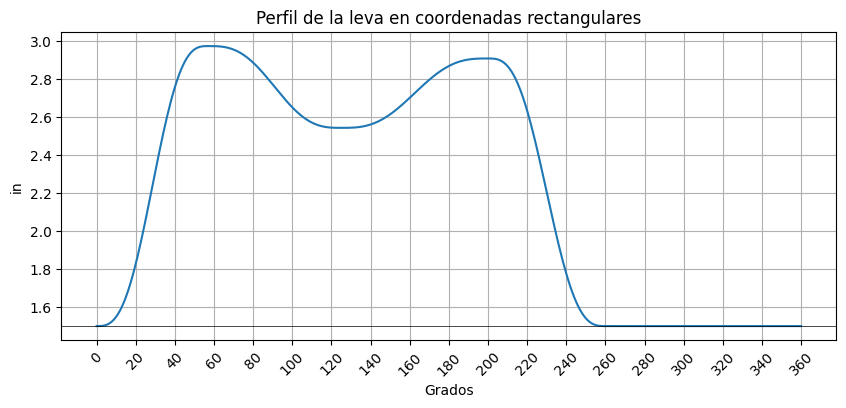

In [12]:
x = np.linspace(0,360, 361)
y1 = cd.Cicloidal(L1, x[0:57], 57, "ascenso")
y2 = cd.Cicloidal(L1_2,x[0:68],68, "descenso")
y3 = cd.Cicloidal(L2_3,x[0:75],75, "ascenso")
y4 = cd.Cicloidal(L3,x[0:60],60, "descenso")
y5 = np.zeros(101)
y = np.concatenate([y1, y2 + L2, y3 + L2, y4, y5]) + radio_leva

plt.figure(figsize=(10, 4))

plt.plot(x, y)

plt.grid(True)
plt.xlabel('Grados')
plt.axhline(radio_leva, color='black', linewidth=0.5)
plt.xticks(np.linspace(0,360, 19), rotation = 45)
plt.ylabel('in')
plt.title('Perfil de la leva en coordenadas rectangulares')

plt.show()

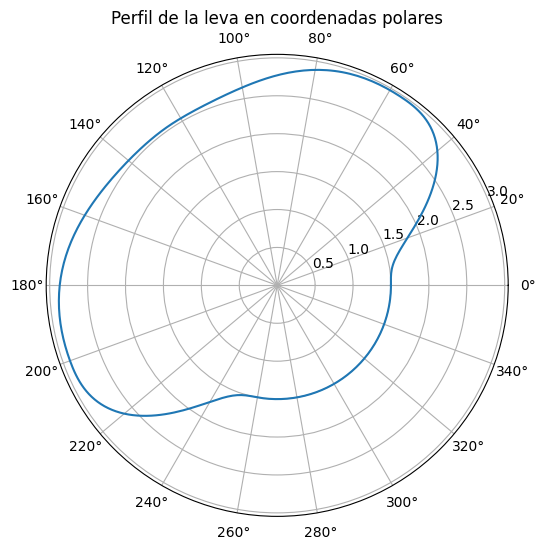

In [15]:
x = np.linspace(0,360, 361)
x = np.radians(x)

plt.figure(figsize=(6, 6))
plt.polar(x, y)
plt.thetagrids(np.arange(0, 360, 20))
plt.title('Perfil de la leva en coordenadas polares')

plt.show()

## Coordenadas para gráficar 

In [8]:
x = np.linspace(0,360, 361)

cd.CoordADAMS(radio=y,theta=x, ruta='./export/CoordADAMS.csv')
cd.CoordINVENTOR(radio=y,theta=x, ruta='./export/CoordINVENTOR.csv')